# MACD


In [11]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
from finta import TA

import warnings
warnings.filterwarnings('ignore')

### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [12]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [13]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


In [14]:
# Plot the DataFrame with hvplot
signals_df["close"].hvplot()

:Curve   [date]   (close)

## Step : Generate trading signals using Price Zone Oscillator 'PZO'

In [22]:
# Read in CSV file in from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
pzo_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"),
    index_col = "date", 
    parse_dates = True, 
    infer_datetime_format = True
)

# Check if NA values are in the data
pzo_df=macd_df[macd_df['volume']!=0]
#macd_df.reset_index(drop=True, inplace=True)
pzo_df.isna().sum()

# Review the DataFrame
pzo_df.head()

,open,high,low,close,volume,PZO
date,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810


In [31]:
import numpy as np
from finta import TA

pzo_df['PZO'] = TA.PZO(ohlcv_df)

pzo_df["Actual Returns"] = pzo_df["close"].pct_change()

pzo_df

,open,high,low,close,volume,PZO,Actual Returns
date,,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000,NaN
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464,0.006295
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689,0.018349
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777,0.000819
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810,0.000818
...,...,...,...,...,...,...,...
2021-01-22 09:30:00,33.27,33.27,33.27,33.27,100,-3.793660,-0.006866
2021-01-22 11:30:00,33.35,33.35,33.35,33.35,200,10.262039,0.002405
2021-01-22 13:45:00,33.42,33.42,33.42,33.42,200,22.411028,0.002099


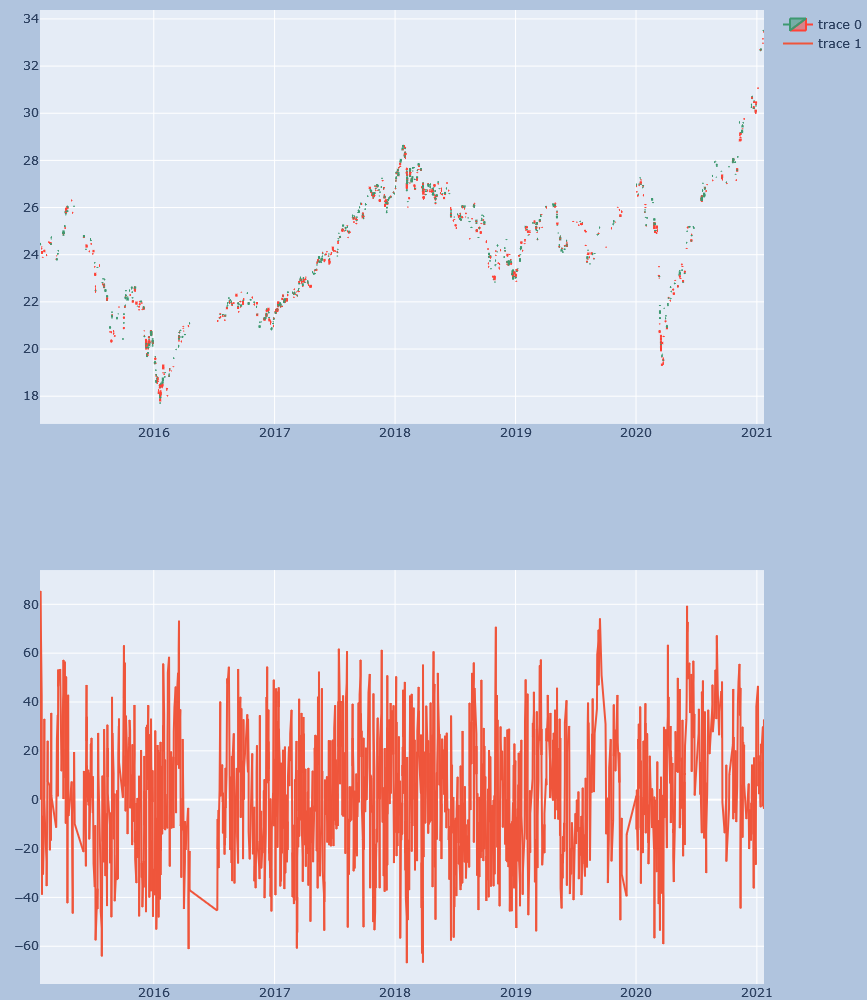

In [24]:
dfpl = pzo_df
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from datetime import datetime

fig = make_subplots(rows=2, cols=1)
fig.append_trace(go.Candlestick(x=dfpl.index,
                                open=dfpl['open'],
                                high=dfpl['high'],
                                low=dfpl['low'],
                                close=dfpl['close']), row=1, col=1)
fig.append_trace(go.Scatter(
    x=dfpl.index,
    y=dfpl['PZO'],
), row=2, col=1)

fig.update_layout(
    margin=dict(l=40, r=40, t=10, b=0),
    paper_bgcolor="LightSteelBlue",
    autosize=False,
    width=1000,
    height=1000,
 )

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

#The "+60" level. Decline in PZO values after surpassing this level is considered a Sell signal to close a long position in a trending market (ADX > 18). 
#The "-40" level. When the PZO plot crosses this level from below, it is considered a Buy signal to open a long position in an uptrend market (ADX > 18, price above the EMA). It is also considered a Buy signal in a non-trending market (ADX < 18). 
#https://tlc.thinkorswim.com/center/reference/Tech-Indicators/studies-library/O-Q/PriceZoneOscillator

In [26]:
pzo_df

,open,high,low,close,volume,PZO
date,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810
...,...,...,...,...,...,...
2021-01-22 09:30:00,33.27,33.27,33.27,33.27,100,-3.793660
2021-01-22 11:30:00,33.35,33.35,33.35,33.35,200,10.262039
2021-01-22 13:45:00,33.42,33.42,33.42,33.42,200,22.411028


In [265]:
# Initialize the new Signal column
pzo_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
pzo_df.loc[(pzo_df['PZO'] >= 30), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
pzo_df.loc[(pzo_df['PZO'] < -25), 'Signal'] = -1

# Review the DataFrame
display(pzo_df.head())
display(pzo_df.tail())

,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000,NaN,0.0,NaN
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464,0.006295,1.0,-0.006295
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689,0.018349,1.0,-0.018349
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777,0.000819,1.0,-0.000819
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810,0.000818,1.0,-0.000818


,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2021-01-22 09:30:00,33.27,33.27,33.27,33.27,100,-3.793660,-0.006866,0.0,0.006866
2021-01-22 11:30:00,33.35,33.35,33.35,33.35,200,10.262039,0.002405,0.0,-0.002405
2021-01-22 13:45:00,33.42,33.42,33.42,33.42,200,22.411028,0.002099,0.0,-0.002099
2021-01-22 14:30:00,33.47,33.47,33.47,33.47,200,32.907327,0.001496,1.0,-0.001496
2021-01-22 15:45:00,33.47,33.47,33.44,33.44,783,14.976378,-0.000896,0.0,0.000896


In [266]:
# Review the DataFrame
display(pzo_df.head())
display(pzo_df.tail())

,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000,NaN,0.0,NaN
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464,0.006295,1.0,-0.006295
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689,0.018349,1.0,-0.018349
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777,0.000819,1.0,-0.000819
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810,0.000818,1.0,-0.000818


,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2021-01-22 09:30:00,33.27,33.27,33.27,33.27,100,-3.793660,-0.006866,0.0,0.006866
2021-01-22 11:30:00,33.35,33.35,33.35,33.35,200,10.262039,0.002405,0.0,-0.002405
2021-01-22 13:45:00,33.42,33.42,33.42,33.42,200,22.411028,0.002099,0.0,-0.002099
2021-01-22 14:30:00,33.47,33.47,33.47,33.47,200,32.907327,0.001496,1.0,-0.001496
2021-01-22 15:45:00,33.47,33.47,33.44,33.44,783,14.976378,-0.000896,0.0,0.000896


In [267]:
pzo_df['Signal'].value_counts()

 0.0    3249
-1.0     556
 1.0     518
Name: Signal, dtype: int64

In [268]:
# Calculate the strategy returns and add them to the signals_df DataFrame
pzo_df['Strategy Returns'] = pzo_df['Actual Returns'] * pzo_df['Signal'].shift()

# Review the DataFrame
display(pzo_df.head())
display(pzo_df.tail())

,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100,0.000000,NaN,0.0,NaN
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100,53.727464,0.006295,1.0,0.000000
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100,71.634689,0.018349,1.0,0.018349
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200,80.395777,0.000819,1.0,0.000819
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200,85.549810,0.000818,1.0,0.000818


,open,high,low,close,volume,PZO,Actual Returns,Signal,Strategy Returns
date,,,,,,,,,
2021-01-22 09:30:00,33.27,33.27,33.27,33.27,100,-3.793660,-0.006866,0.0,-0.000000
2021-01-22 11:30:00,33.35,33.35,33.35,33.35,200,10.262039,0.002405,0.0,0.000000
2021-01-22 13:45:00,33.42,33.42,33.42,33.42,200,22.411028,0.002099,0.0,0.000000
2021-01-22 14:30:00,33.47,33.47,33.47,33.47,200,32.907327,0.001496,1.0,0.000000
2021-01-22 15:45:00,33.47,33.47,33.44,33.44,783,14.976378,-0.000896,0.0,-0.000896


<Axes: xlabel='date'>

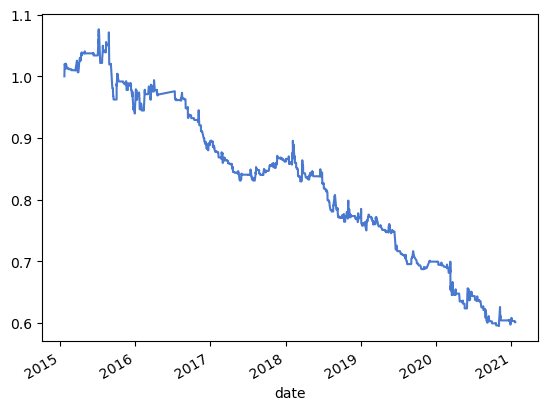

In [269]:
# Plot Strategy Returns to examine performance
(1 + pzo_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [270]:
# Assign a copy of the PZO columns to a features DataFrame called X
X = pzo_df[['PZO']].shift().dropna()

# Review the DataFrame
X.head()

,PZO
date,
2015-01-21 11:00:00,0.000000
2015-01-22 15:00:00,53.727464
2015-01-22 15:15:00,71.634689
2015-01-22 15:30:00,80.395777
2015-01-26 12:30:00,85.549810


In [271]:
# Create the target set selecting the Signal column and assiging it to y
y = pzo_df['Signal']

# Review the value counts
y.value_counts()

 0.0    3249
-1.0     556
 1.0     518
Name: Signal, dtype: int64

In [272]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-01-21 11:00:00


In [273]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-04-21 11:00:00


In [274]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,PZO
date,
2015-01-21 11:00:00,0.000000
2015-01-22 15:00:00,53.727464
2015-01-22 15:15:00,71.634689
2015-01-22 15:30:00,80.395777
2015-01-26 12:30:00,85.549810


In [275]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,PZO
date,
2015-01-21 11:00:00,0.000000
2015-01-22 15:00:00,53.727464
2015-01-22 15:15:00,71.634689
2015-01-22 15:30:00,80.395777
2015-01-26 12:30:00,85.549810


In [276]:
X_test.head()

,PZO
date,
2015-04-27 09:30:00,-6.845464
2015-04-27 11:30:00,7.571423
2015-04-27 12:00:00,-6.896450
2015-04-27 12:15:00,-5.969985
2015-04-29 12:45:00,-18.568447


In [277]:
y_train.value_counts()

 0.0    110
 1.0     41
-1.0      8
Name: Signal, dtype: int64

In [278]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [279]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [280]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       548
         0.0       0.79      0.95      0.87      3138
         1.0       0.62      0.51      0.56       477

    accuracy                           0.78      4163
   macro avg       0.47      0.49      0.48      4163
weighted avg       0.67      0.78      0.72      4163



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [281]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = (
    predictions_df["Actual Returns"] * predictions_df["Predicted"]
)

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-04-27 09:30:00,0.0,0.024096,0.0
2015-04-27 11:30:00,0.0,-0.001898,-0.0
2015-04-27 12:00:00,0.0,0.000000,0.0
2015-04-27 12:15:00,0.0,-0.001901,-0.0
2015-04-29 12:45:00,0.0,-0.017143,-0.0


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,0.0,-0.006866,-0.0
2021-01-22 11:30:00,0.0,0.002405,0.0
2021-01-22 13:45:00,0.0,0.002099,0.0
2021-01-22 14:30:00,0.0,0.001496,0.0
2021-01-22 15:45:00,0.0,-0.000896,-0.0


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

<Axes: xlabel='date'>

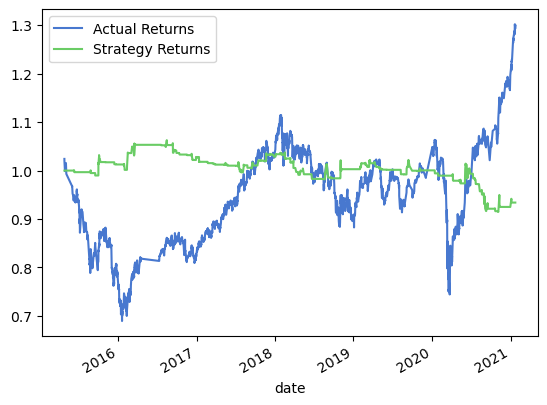

In [282]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()


In [283]:
annualized_return = predictions_df["Strategy Returns"].mean() * 252
annualized_std = predictions_df["Strategy Returns"].std() * np.sqrt(252)
sharpe_ratio = round(annualized_return/annualized_std, 3)

# Display results
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: -0.135


<Axes: xlabel='date'>

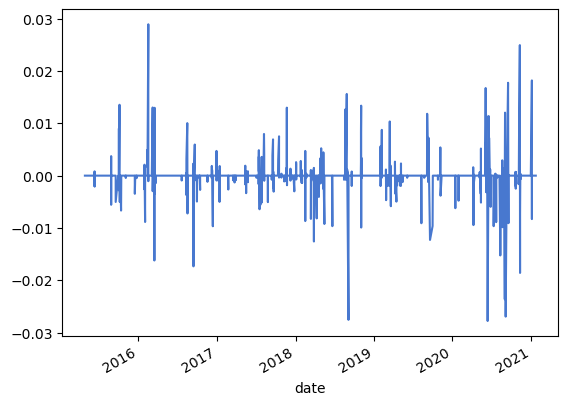

In [284]:
#Best-Case/Worst-Case Performance
predictions_df["Strategy Returns"].plot()

---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [285]:
# Import a new classifier from SKLearn
from sklearn.linear_model import LogisticRegression

# Initiate the model instance
logistic_regression_model = LogisticRegression()


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [286]:
# Fit the model using the training data
model = logistic_regression_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
pred = logistic_regression_model.predict(X_test_scaled)

# Review the model's predicted values
pred


array([0., 0., 0., ..., 0., 0., 0.])

### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [287]:
# Use a classification report to evaluate the model using the predictions and testing data
backtest_classification_report = classification_report(y_test, pred)

# Print the classification report
print(backtest_classification_report)


              precision    recall  f1-score   support

        -1.0       0.95      0.18      0.30       548
         0.0       0.81      0.95      0.88      3138
         1.0       0.62      0.51      0.56       477

    accuracy                           0.80      4163
   macro avg       0.80      0.54      0.58      4163
weighted avg       0.81      0.80      0.76      4163



In [288]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
backtest_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
backtest_predictions_df['Predicted'] = pred

# Add the actual returns to the DataFrame
backtest_predictions_df['Actual Returns'] = signals_df["Actual Returns"]

# Add the strategy returns to the DataFrame
backtest_predictions_df['Strategy Returns'] = (
    backtest_predictions_df["Actual Returns"] * backtest_predictions_df["Predicted"]
)

# Review the DataFrame
display(backtest_predictions_df.head())
display(backtest_predictions_df.tail())


,Predicted,Actual Returns,Strategy Returns
date,,,
2015-04-27 09:30:00,0.0,0.024096,0.0
2015-04-27 11:30:00,0.0,-0.001898,-0.0
2015-04-27 12:00:00,0.0,0.000000,0.0
2015-04-27 12:15:00,0.0,-0.001901,-0.0
2015-04-29 12:45:00,0.0,-0.017143,-0.0


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,0.0,-0.006866,-0.0
2021-01-22 11:30:00,0.0,0.002405,0.0
2021-01-22 13:45:00,0.0,0.002099,0.0
2021-01-22 14:30:00,0.0,0.001496,0.0
2021-01-22 15:45:00,0.0,-0.000896,-0.0


<Axes: xlabel='date'>

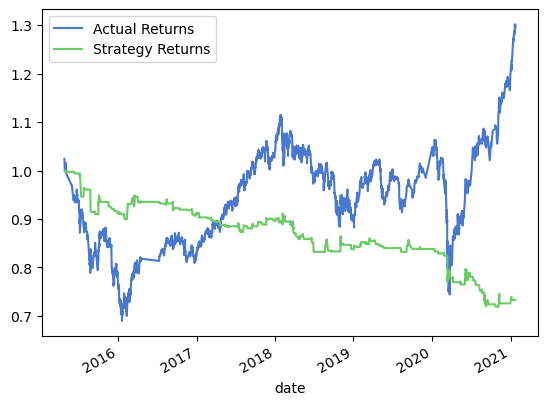

In [289]:
# Plot the actual returns versus the strategy returns
(1 + backtest_predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()
